In [6]:
import qiskit as qk
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel
import matplotlib
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline
from IPython.display import display

In [7]:
import warnings
warnings.filterwarnings('ignore')
from qiskit.tools.jupyter import *

In [20]:
token = 'b6464d13b284902ed1d1a48d2aed6bd0474c7be45011741b0fb879614419659cb722e74a046af3d5caae0398aec9bdac8843068ecbee91aff466cf3e30f3bef5'
try:
    IBMQ.load_account()
except:
    qk.IBMQ.save_account(token=token)
    qk.IBMQ.enable_account(token)
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
backend = provider.get_backend("ibmq_armonk")

ibmqfactory.load_account:WARNING:2022-05-04 23:29:31,729: Credentials are already in use. The existing account in the session will be replaced.


In [21]:
backend_config = backend.configuration()
assert backend_config.open_pulse, "Backend doesn't support Pulse"

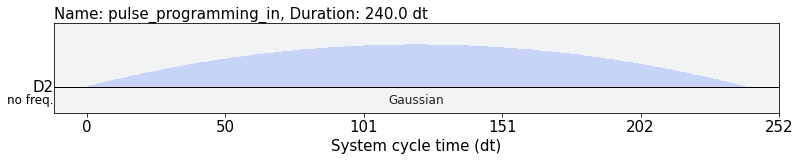

In [99]:
from qiskit import pulse
dc = pulse.DriveChannel
d0, d1, d2, d3, d4 = dc(0), dc(1), dc(2), dc(3), dc(4)

with pulse.build(name='pulse_programming_in') as pulse_prog:
    #pulse.play(pulse.Constant(bell_prep.duration, 0.02), d0)
    #pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], d1)
    pulse.play(pulse.library.Gaussian(duration=240,sigma=2400, amp=1), d2)
    #pulse.play(pulse.library.Drag(duration=24,sigma=10,beta=1, amp=0.1), d3)

pulse_prog.draw()

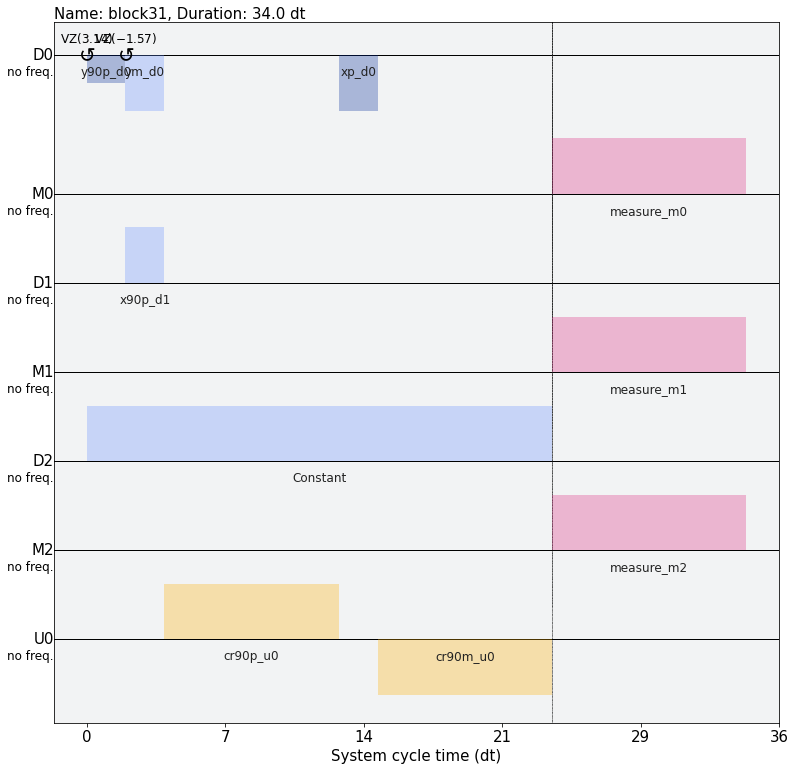

In [30]:
import math
from qiskit.test.mock import FakeOpenPulse3Q

# TODO: This example should use a real mock backend.
backend = FakeOpenPulse3Q()

d2 = pulse.DriveChannel(2)

with pulse.build(backend) as bell_prep:
    pulse.u2(0, math.pi, 0)
    pulse.cx(0, 1)

with pulse.build(backend) as decoupled_bell_prep_and_measure:
    # We call our bell state preparation schedule constructed above.
    with pulse.align_right():
        pulse.call(bell_prep)
        pulse.play(pulse.Constant(bell_prep.duration, 0.02), d2)
        pulse.barrier(0, 1, 2)
        registers = pulse.measure_all()

decoupled_bell_prep_and_measure.draw()

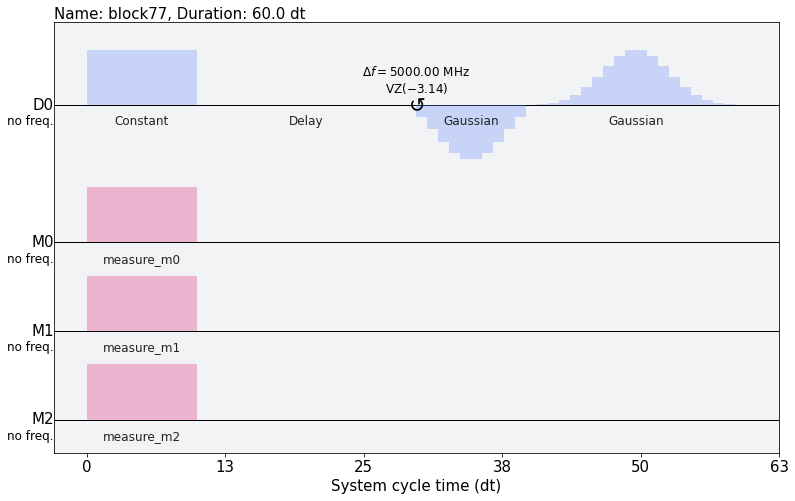

In [56]:
with pulse.build(backend) as drive_sched:
    d0 = pulse.drive_channel(0)
    a0 = pulse.acquire_channel(0)

    pulse.play(pulse.library.Constant(10, 1.0), d0)
    pulse.delay(20, d0)
    pulse.shift_phase(3.14/2, d0)
    pulse.set_phase(3.14, d0)
    pulse.shift_frequency(1e7, d0)
    pulse.set_frequency(5e9, d0)

    with pulse.build() as temp_sched:
        pulse.play(pulse.library.Gaussian(10, 1.0, 3.0), d0)
        pulse.play(pulse.library.Gaussian(20, -1.0, 3.0), d0)

    pulse.call(temp_sched)
    pulse.measure_all()
    pulse.acquire(30, a0, pulse.MemorySlot(0))
    
drive_sched.draw()